In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,2,...,2,B0001,Alam,8,3000000,0,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Presentation & Selling Skills Using Story-Telling,Powerful Closing Technique
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,3,...,2,B0002,Reza,11,4000000,10,Sales & Marketing Series,Presentation & Selling Skills Using Story-Telling,Presentation & Selling Skills Using Story-Telling,Professional Selling Skills
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,4,...,4,B0003,Haris,14,11000000,25,Sales & Marketing Series,Professional Selling Skills,Powerful Closing Technique,Advanced Digital Marketing & Foundation
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,2,...,3,B0004,Reza,11,11000000,10,Sales & Marketing Series,Optimizing in Growing Your Business,Presentation & Selling Skills Using Story-Telling,Professional Selling Skills
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,11000000,50,Sales & Marketing Series,Advanced Digital Marketing & Foundation,Marketing Research For Business Using SPSS,Powerful Closing Technique


## Univariatee Analysis

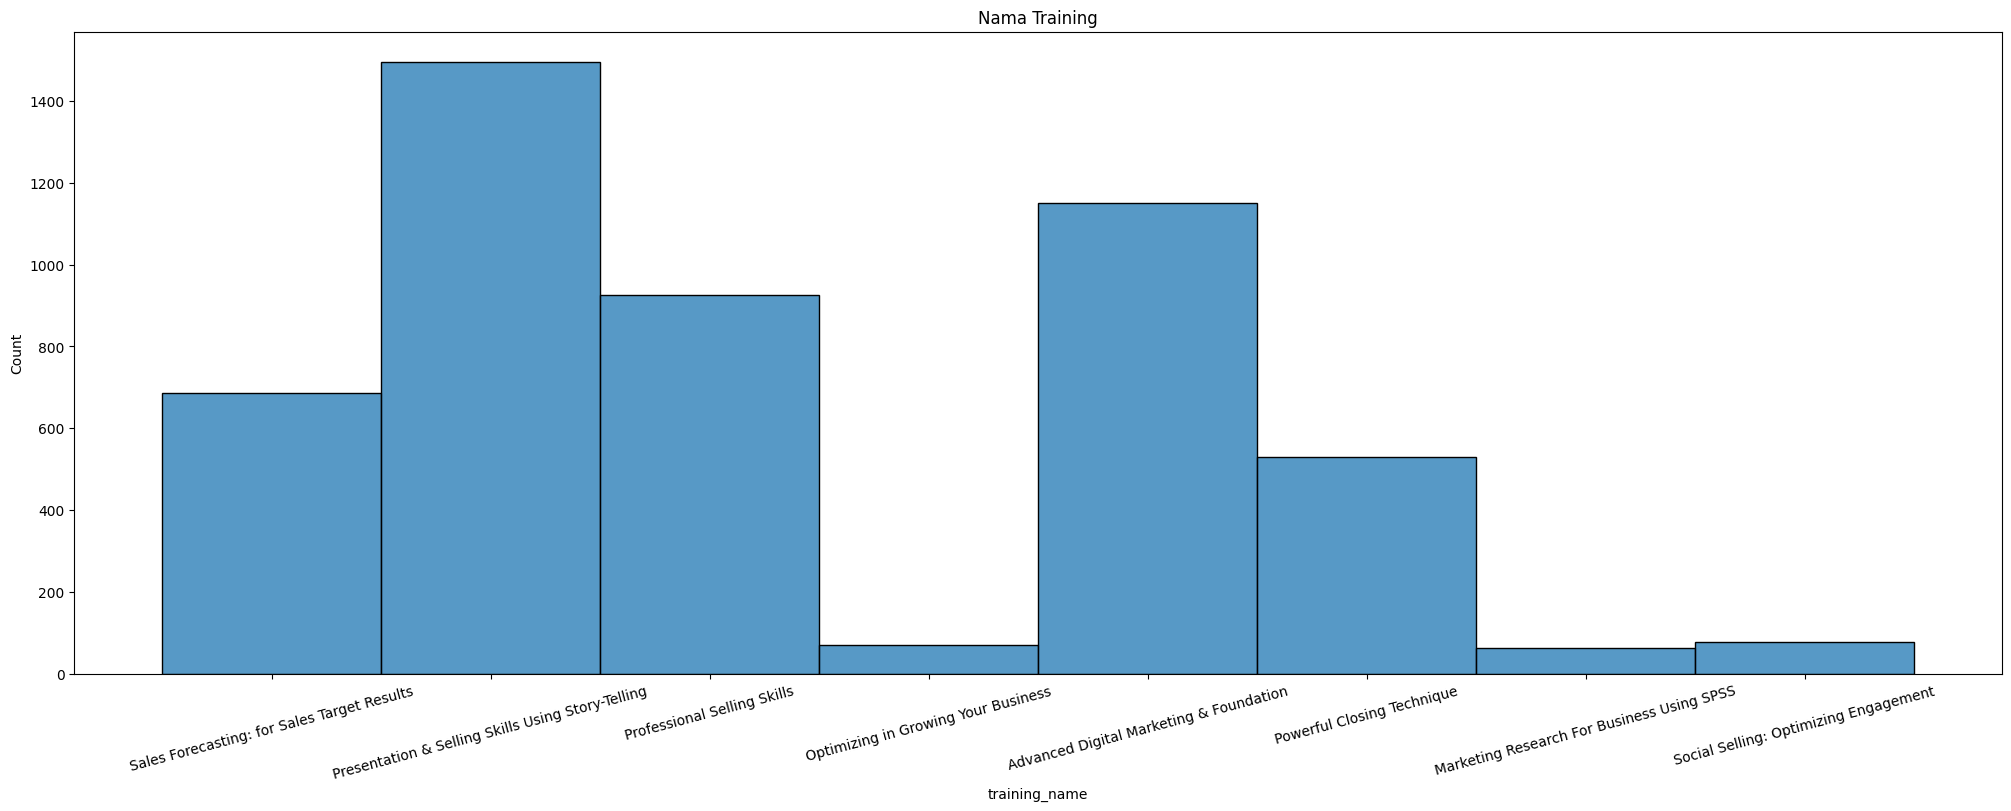

Presentation & Selling Skills Using Story-Telling    1494
Advanced Digital Marketing & Foundation              1151
Professional Selling Skills                           926
Sales Forecasting: for Sales Target Results           686
Powerful Closing Technique                            530
Social Selling: Optimizing Engagement                  78
Optimizing in Growing Your Business                    71
Marketing Research For Business Using SPSS             64
Name: training_name, dtype: int64


In [3]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

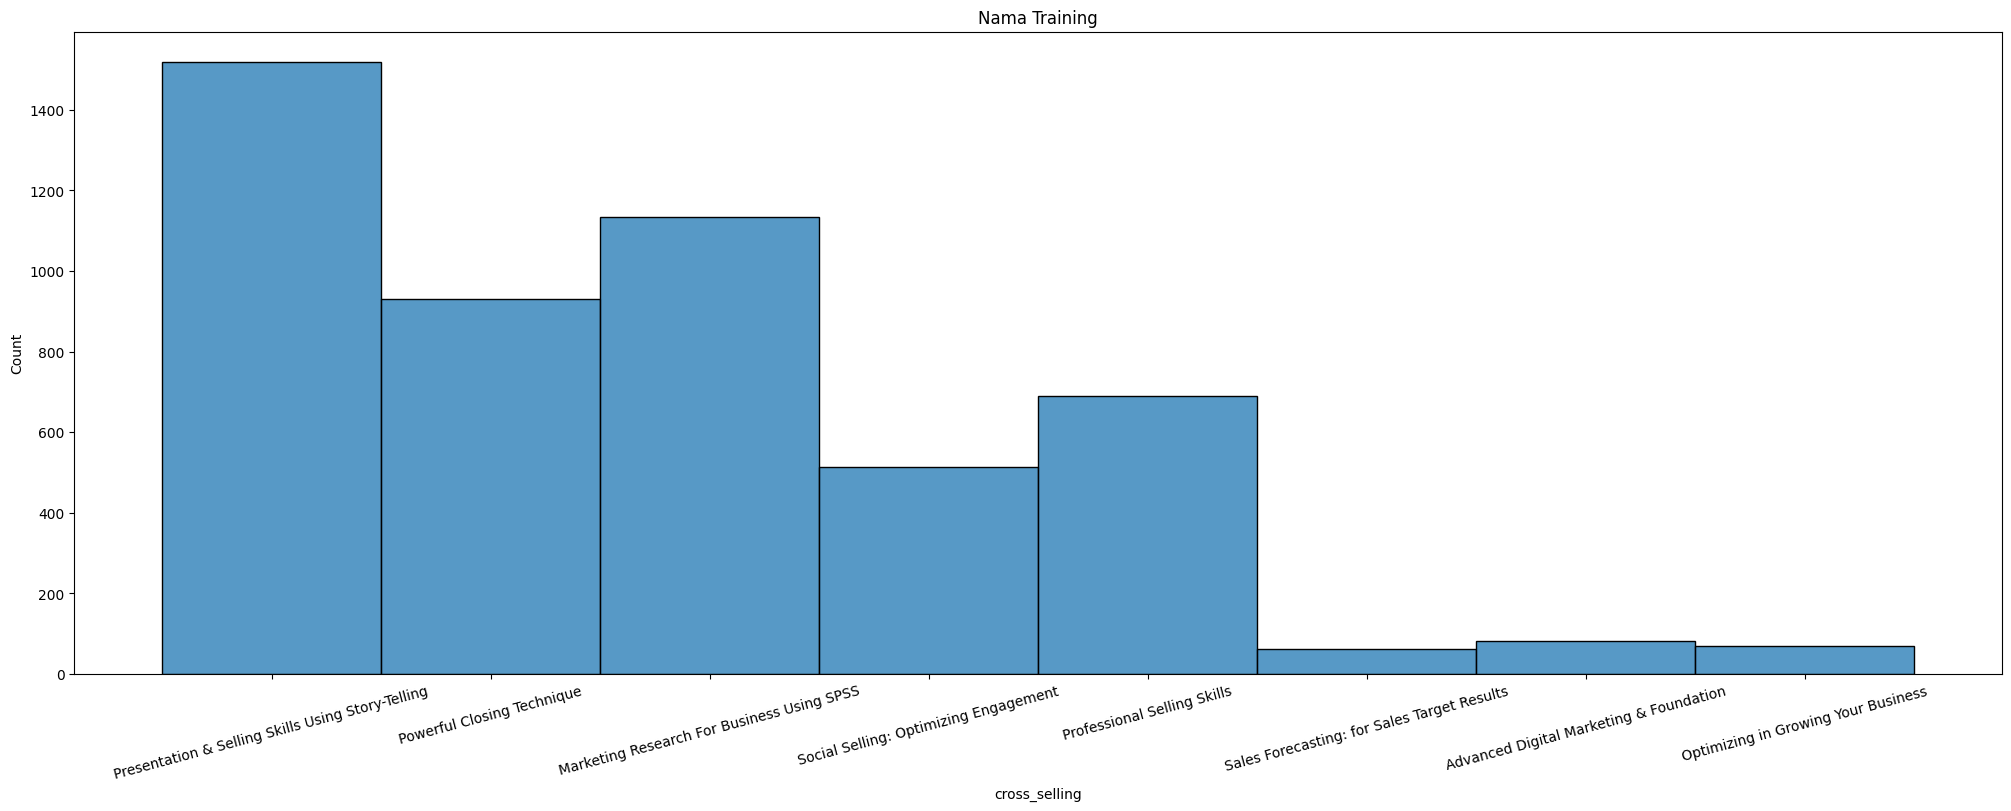

Presentation & Selling Skills Using Story-Telling    1518
Marketing Research For Business Using SPSS           1134
Powerful Closing Technique                            931
Professional Selling Skills                           689
Social Selling: Optimizing Engagement                 514
Advanced Digital Marketing & Foundation                82
Optimizing in Growing Your Business                    69
Sales Forecasting: for Sales Target Results            63
Name: cross_selling, dtype: int64


In [4]:
# Cross Selling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["cross_selling"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["cross_selling"].value_counts())

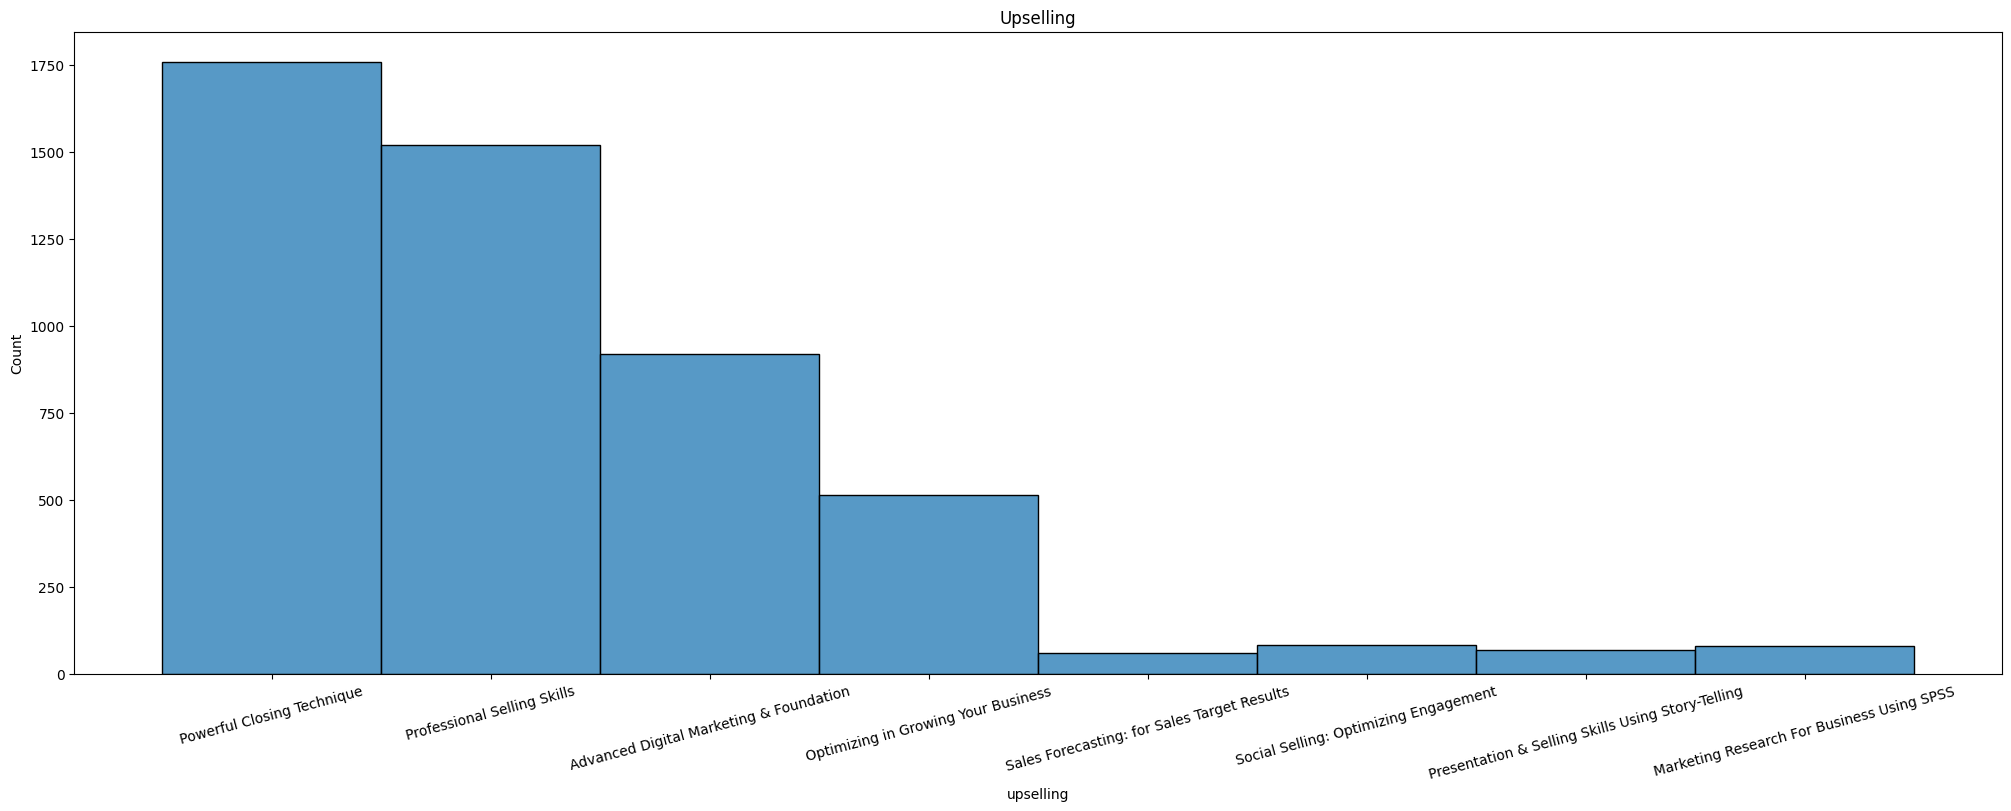

Powerful Closing Technique                           1757
Professional Selling Skills                          1518
Advanced Digital Marketing & Foundation               919
Optimizing in Growing Your Business                   513
Social Selling: Optimizing Engagement                  83
Marketing Research For Business Using SPSS             80
Presentation & Selling Skills Using Story-Telling      70
Sales Forecasting: for Sales Target Results            60
Name: upselling, dtype: int64


In [5]:
# Upselling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["upselling"], ax=ax)
ax.set_title("Upselling")
plt.xticks(rotation=15)
plt.show()
print(df["upselling"].value_counts())